## - 데이터 살펴보기
## - 결측치 확인과 처리(교재 PART5의  1절)
## - 중복행 제거(교재 PART5의 2절)

# 11/23 09:40~

## 교재 172pg

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# 예제 5-1
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# deck 열의 NaN 개수 계산하기
nan_deck = df['deck'].value_counts(dropna=False) #dropna는 na를 삭제하지말고 개수 세줘라는 뜻
print(nan_deck)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


In [4]:
# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull()) #R의 is.na와 같은 역할이다. 누락 데이터가 있는 경우 True를 반환한다.

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


In [5]:
# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull()) #결측치가 아니면 True

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


In [6]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


In [7]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.isnull().sum(axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


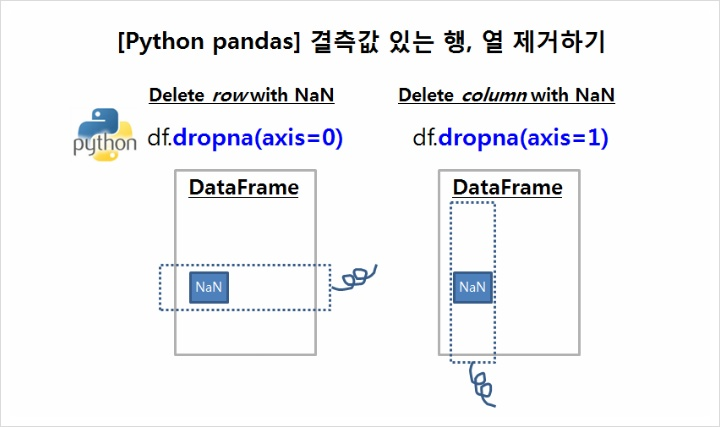

In [8]:
# 예제 5-2
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
print(missing_df)

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False      

In [9]:
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()    # 각 열의 NaN 개수 파악
    try: 
        print(col, ': ', missing_count[True])   # NaN 값이 있으면 개수를 출력
    except:
        print(col, ': ', 0)                     # NaN 값이 없으면 0개 출력
        
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [10]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

714


In [11]:
# 예제 5-3
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))
print('\n')

# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [12]:
# 예제 5-4
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object




In [13]:
df['embark_town'].value_counts(dropna=True)

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [14]:
# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

Southampton




In [15]:
df['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [16]:
# 예제 5-5
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object




In [17]:
# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


In [18]:
# 예제 5-6
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)
print('\n')

# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


0    False
1     True
2    False
3    False
4    False
dtype: bool


0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [19]:
# 예제 5-7
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2




In [20]:
# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)
print('\n')

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2




In [21]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


### Seaborn 패키지에서 제공하는 타이타닉 데이터셋

1. survived - 생존 여부, 0이면 사망, 1이면 생존
2. pclass - 객실 등급, 1이면 1등급, 2이면 2등급, 3이면 3등급
3. sex - 성별, male이면 남자, female이면 여자
4. age - 나이
5. sibsp - 함께 탑승한 형제 및 배우자 수
6. parch - 함께 탑승한 자녀 및 부모 수
7. fare - 요금
8. embarked - 탑승지 이름 앞글자, C는 Cherbourg, Q는 Queenstown, S는 Southampton
9. class - 객실 등급, First면 1등급, Second면 2등급, Third면 3등급
10. who - 남자, 여자, 아이(man, woman, child
11. adult_male - 성인 남자인지 여부, True면 성인 남자, False면 그외
12. deck - 선실 번호 첫 알파벳(A, B, C, D, E, F, G)
13. embark_town - 탑승지 이름(Cherbourg, Queenstown, Southampton)
14. alive - 생존여부(no면 사망, yes면 생존)
15. alone - 혼자 탑승했는지 여부, True면 혼자 탑승, False면 가족과 함께 탑승

 

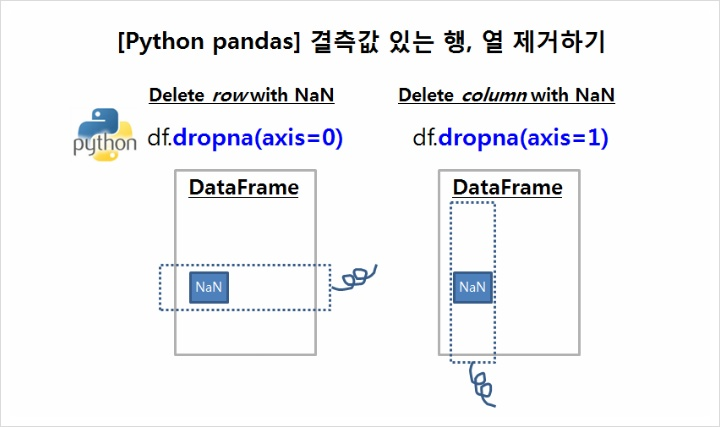

### 13:00~

In [25]:
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [26]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

714


In [27]:
# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


In [28]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [29]:
# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object




In [30]:
df1 = df.copy()

In [31]:
df1['embark_town'].value_counts(dropna=True)

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [32]:
# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df1['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)

Southampton


In [33]:
df1['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df1['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [34]:
# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object




In [35]:
df2 = df.copy()

In [36]:
# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df2['embark_town'].fillna(method='ffill', inplace=True) # bfill
print(df2['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


In [37]:
import pandas as pd
bank_df = pd.read_csv('data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [38]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터형을 확인
print(bank_df.dtypes)

(7234, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [39]:
# 데이터에 대한 여러가지 정보들을 한번에 출력
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


In [40]:
# 기술 통계량 확인
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [41]:
bank_df.isna().sum() 

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [42]:
bank_df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

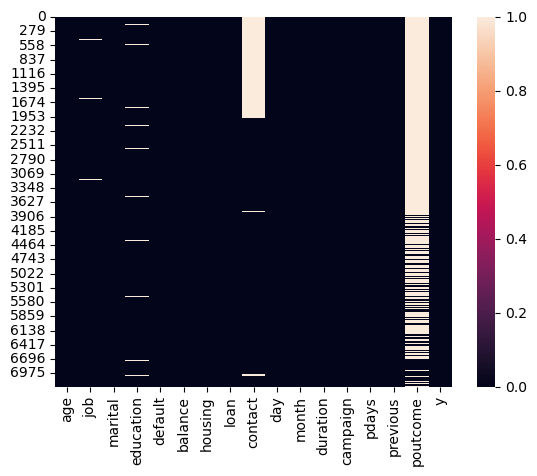

In [43]:
import seaborn as sns
sns.heatmap(bank_df.isna(), cbar=True)

In [44]:
!pip install missingno

<AxesSubplot:>

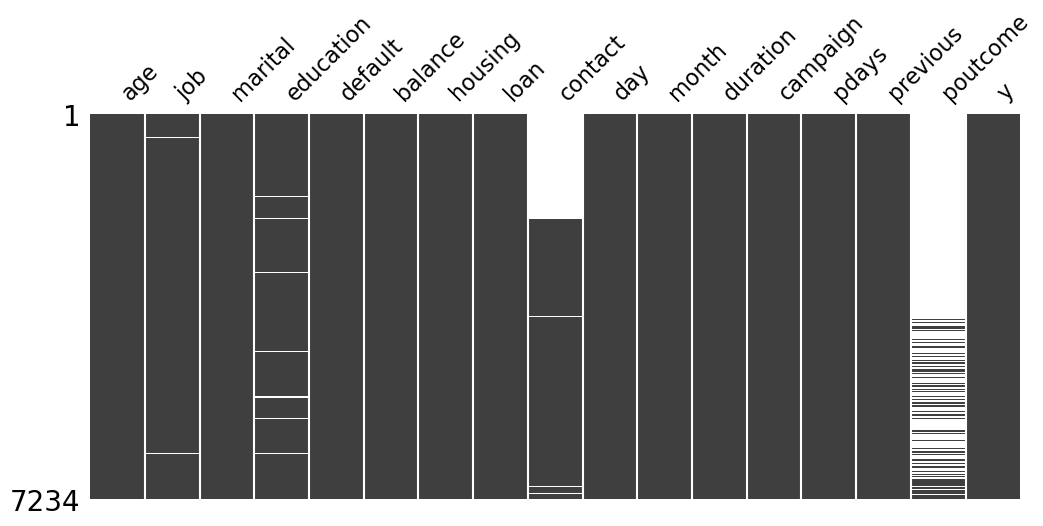

In [45]:
import missingno as msno #missingno는 결측치와 관련된 시각화를 하는것에 관련됨.
msno.matrix(bank_df, figsize=(12,5), sparkline=False)

In [46]:
msno.matrix?

Signature:
msno.matrix(
    df,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(25, 10),
    width_ratios=(15, 1),
    color=(0.25, 0.25, 0.25),
    fontsize=16,
    labels=None,
    label_rotation=45,
    sparkline=True,
    freq=None,
    ax=None,
)
Docstring:
A matrix visualization of the nullity of the given DataFrame.

:param df: The `DataFrame` being mapped.
:param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default).
:param n: The max number of columns to include in the filtered DataFrame.
:param p: The max percentage fill of the columns in the filtered DataFrame.
:param sort: The row sort order to apply. Can be "ascending", "descending", or None.
:param figsize: The size of the figure to display.
:param fontsize: The figure's font size. Default to 16.
:param labels: Whether or not to display the column names. Defaults to the underlying data labels when there are
    50 columns or less, and no labels when there are more t

<AxesSubplot:>

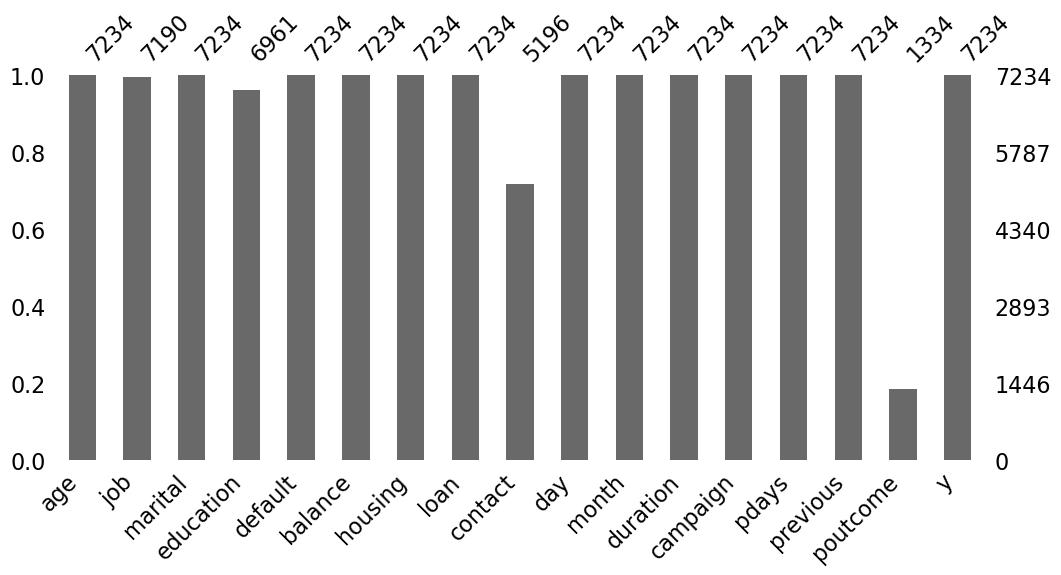

In [47]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 포함한 행 삭제

In [ ]:
# job과 education 열에서 결측치가 포함된 행을 삭제
bank_df = bank_df.dropna(subset=['job', 'education']) #job과 education 중에 하나라도 결측치가 있으면 없애라.

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

In [ ]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 2400개이상 포함한 열 삭제

In [48]:
# 결측치이 2400개 이상인 열을 제외
bank_df = bank_df.dropna(thresh=2400, axis=1) # axis 중요!!!(내가 적은거 아님) #열을 삭제한다. 결측치가 2400개 이상인 열은 삭제한다.

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)
print(bank_df.info())

(7234, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  y          7234 non-null   object
dtypes: int64(7), object(9)
memory usage: 904.4+ KB
None


<AxesSubplot:>

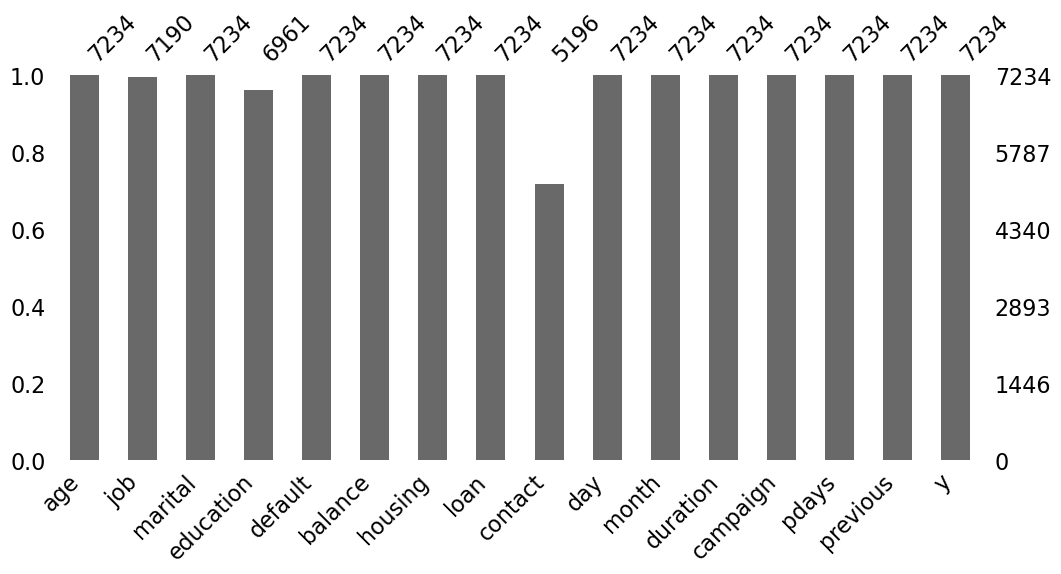

In [49]:
msno.bar(bank_df, figsize=(12,5))

### 결측치 채우기

In [50]:
# 결측치을 「unknown」으로 치환
bank_df = bank_df.fillna({'contact':'unknown'})#딕셔너리로 'contact'라는 컬럼에 존재하는 결측치를 'unknown'으로 바꿔라. #바꿀 값이 여러개라면 {'컬럼명1':채울값1, '컬럼명2':채울값2}으로 가능하다.
#contact는 상담한 직원에 대한 정보가 들어가있다. 누가 상담했는지 모르니까 NA로 되어있는데 이걸 unknown으로 바꾸는 것.

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


<AxesSubplot:>

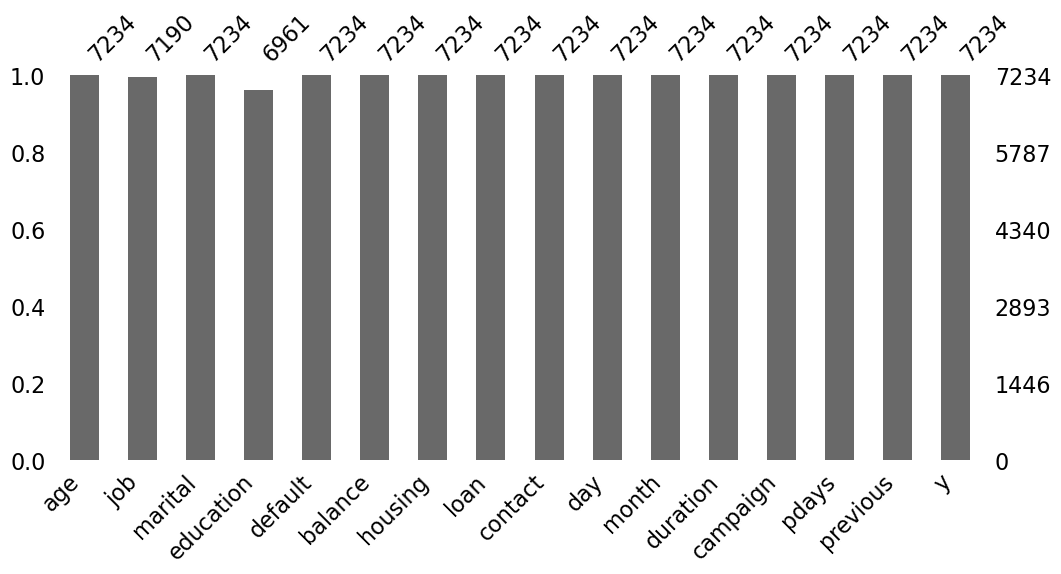

In [51]:
msno.bar(bank_df, figsize=(12,5))

In [52]:
import numpy as np #np.nan을 사용하기 위함. 

time_index = pd.date_range("2022-01-01", periods=5, freq="MS") #날짜데이터도 인덱스로 사용할 수 있다. #'freq'='H'는 시간단위, 'D'는 일단위다. MS는 '월단위'다.
#date_range는 일정간격으로 떨어진 날짜 데이터들을 만든다. periods는 데이터 개수, freq는 날짜나 시간 단위를 말하는 것 같다.
print(time_index)

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01'],
              dtype='datetime64[ns]', freq='MS')


In [53]:
dataframe = pd.DataFrame(index=time_index)
display(dataFrame)#인덱스만 정의된 데이터프레임. 인덱스가 날짜다.
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0] #결측치값을 직접 키인할때는 numpy라는 api를 사용한다. numpy라는 모듈에는 nan라는 전역변수같은애가 있는데 얘가 결측치를 의미하는 값으로 쓰인다. 그럼 판다스에는 결측치를 의미하는 리터럴이 없는가 지금은 있는데 추가된지 얼마 안 됐다. 그전에는 결측치를 값으로 쓰고 싶다면 np.nan를 했다.
dataframe

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,NaN
2022-04-01,NaN
2022-05-01,5.0


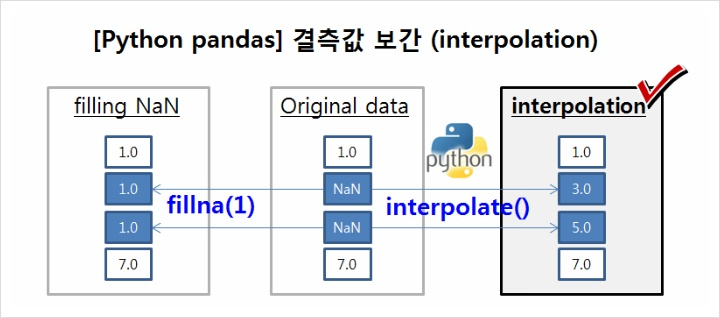

In [56]:
# 누락된 값을 보간합니다.
dataframe.interpolate() #결측치가 있으면 결측치의 이전과 다음값 간의 관계를 선형관계로 해서 그 사이의 적당한 값으로 채어준다.

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,3.0
2022-04-01,4.0
2022-05-01,5.0


In [55]:
# 앞쪽으로 채우기(Forward-fill)
dataframe.ffill() #결측의 앖에 값으로 채운다.

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,2.0
2022-04-01,2.0
2022-05-01,5.0


In [57]:
dataframe.fillna(method ='ffill')  #결측의 앖에 값으로 채운다. #method='ffill'이 기본값인것 같다.

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,2.0
2022-04-01,2.0
2022-05-01,5.0


In [ ]:
# 뒤쪽으로 채우기(Back-fill)
dataframe.bfill()

In [ ]:
dataframe.fillna(method ='bfill') 

In [58]:
dict = {'One' :  [np.nan, np.nan, 95, 80], 
    'Two' : [np.nan, np.nan, np.nan, np.nan], 
    'Three':[52, np.nan, 80, 98], 
    'Four':[np.nan, np.nan, np.nan, 65],
    'Five':[10, None, 30, 40], #None도 Nan으로 display된다. None은 파이썬의 리터럴이고 np.nan은 numpy에서만 제공되는 리터럴인데 데이터프레임 만들때는 다 같은 결측치로 인식한다.
    'Six': [np.nan, np.nan, np.nan, pd.NaT], #판다스에서는 결측치를 NaT로 쓴다. 새롭게 추가돼서 별로 알려져있지 않다.
    'Seven': [np.nan, np.nan, None, np.nan],
    'Eight': [np.nan, np.nan, None, pd.NaT]} 

df = pd.DataFrame(dict)
display(df) #NaT도 출력되는데 NaN처럼 결측치를 나타내는 것으로 사용하면 된다.

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [59]:
df.dropna(how = 'all')  #모든 nan이 삭제된다.

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [60]:
df.dropna(how = 'all', axis=1) 

,One,Three,Four,Five
0,NaN,52.0,NaN,10.0
1,NaN,NaN,NaN,NaN
2,95.0,80.0,NaN,30.0
3,80.0,98.0,65.0,40.0


In [ ]:
df.dropna(subset=['One', 'Four'])

In [ ]:
df.dropna(subset=['Eight']) # axis 지정하지 않았기 때문에 행 삭제

In [ ]:
df.isna()

In [ ]:
df.isna().sum() #열단위로의 합

In [61]:
dict = {'First Score':[100, 90, None, 95, 85], #None은 np.nan
        'Second Score': [30, 45, None, np.nan, 60], 
        'Third Score':[np.nan, 40, np.nan, 80, None]} 
df = pd.DataFrame(dict) 
display(df)

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [66]:
df.isna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [67]:
df.fillna(0) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [68]:
df.fillna(method ='ffill') #NaN는위에 값으로 채워라

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [69]:
df.fillna(method ='bfill')  #NaN는 아래 값으로 채워라

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [70]:
df.replace(to_replace = np.nan, value = -50) #replace는 결측치가 아닌 다른 값을 또다른 값으로 쓸 때 원래 썼는데 결측치를 찾아서 다른 값으로 바꿀 때도 사용한다.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [71]:
df.interpolate(limit_direction ='forward')  #interpolate를 할 때는 값을 채우는데 있어서 앞뒤의 값을 보고 중간값을 가져다가 쓴다. #첫번째값은 그 앞에 값이 없어서 바꾸지 않고 NaN 으로 남는다.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [72]:
df.interpolate(limit_direction ='backward') #앞뒤의 중간값을 쓰는데 마지막 값은 다른 값을 쓰지 않고 NaN으로 나둔다.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [73]:
df.interpolate(limit_direction ='both') #NaN이 맨앞이면 뒤에 값을 쓰고 맨 뒤면 앞에 값을 쓴다.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


---
### 중복행 채크와 제거

In [ ]:
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)

In [ ]:
# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)

In [ ]:
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

In [ ]:
# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)

In [ ]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

---

### auto-mpg.csv 의 설명
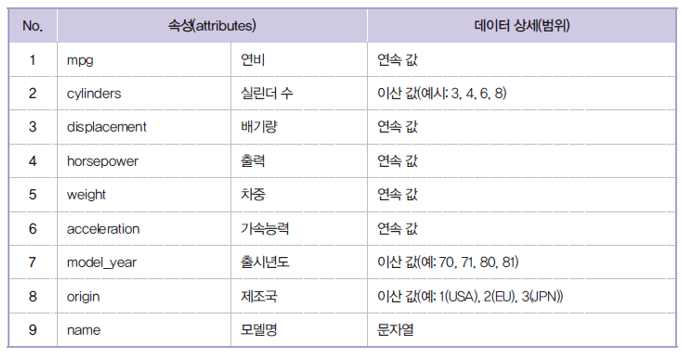

In [62]:
import pandas as pd
# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)
# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
print(df.head(3))    

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  


In [63]:
print(df.dtypes)   

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


In [64]:
# horsepower 열의 고유값 확인
print(df['horsepower'].unique()) #중복된 값들은 한 번만 출력(즉 고유값 출력) #horsepower열은 중간에 '?' 하나때문에 수치데이터가 아닌 문자열로 인식하게 된다.
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




### 타입 변환

In [65]:
# 누락 데이터('?') 삭제 
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan(결측치)으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제(horsepower열의 데이터 중에 결측치가 있는 행 전체를 삭제)
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 자료형 확인
print(df['horsepower'].dtypes)  

float64


---